In [287]:
import numpy as np

In [288]:
rand_numbers = np.random.uniform(low=0,high=1,size=100000)

In [289]:
np.all(rand_numbers > 0)

True

In [290]:
np.all(rand_numbers < 1)

True

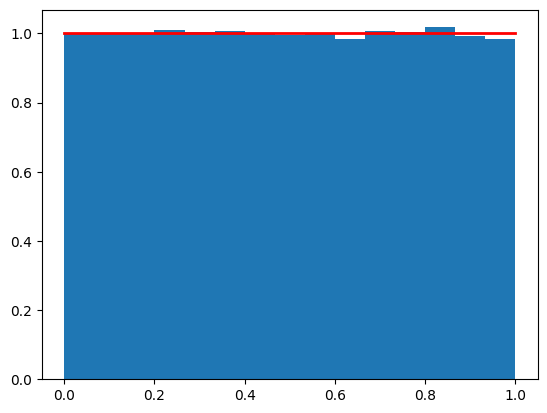

In [291]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(rand_numbers, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

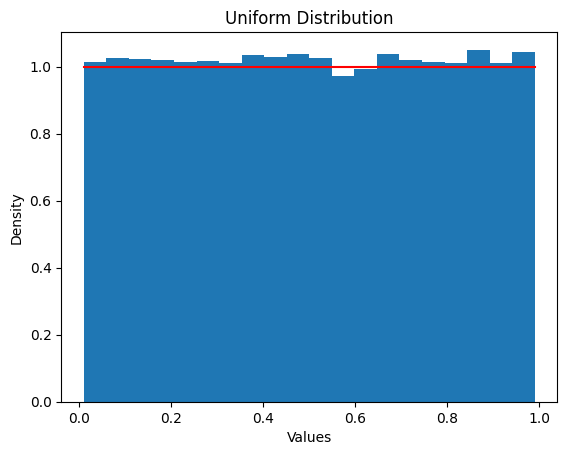

In [292]:
import numpy as np
import matplotlib.pyplot as plt

values = np.random.uniform(0.01, 0.99, 100000)
count, bins, ignored = plt.hist(values, 20, density=True)
plt.plot(bins, np.ones_like(bins),color='r')
plt.title('Uniform Distribution')
plt.ylabel('Density')
plt.xlabel('Values')
plt.show()

In [293]:
# Period parameters
N = 624
M = 397
MATRIX_A = 0x9908b0df
UPPER_MASK = 0x80000000
LOWER_MASK = 0x7fffffff

# Tempering parameters
TEMPERING_MASK_B = 0x9d2c5680
TEMPERING_MASK_C = 0xefc60000

# Initialize the array
mt = [0] * N
index = N + 1
lower_mask = (1 << 31) - 1
upper_mask = (1 << 31)

def seed_mt(seed):
    global mt
    global index
    global lower_mask
    global upper_mask

    mt[0] = seed
    for i in range(1, N):
        mt[i] = (1812433253 * (mt[i - 1] ^ (mt[i - 1] >> 30)) + i) & 0xffffffff

    index = N

def extract_number():
    global mt
    global index
    global lower_mask
    global upper_mask

    if index >= N:
        if index > N:
            raise Exception("Generator was never seeded")
        twist()

    y = mt[index]
    y ^= (y >> 11)
    y ^= (y << 7) & TEMPERING_MASK_B
    y ^= (y << 15) & TEMPERING_MASK_C
    y ^= (y >> 18)

    index += 1
    return y

def twist():
    global mt
    global index
    global lower_mask
    global upper_mask

    for i in range(N):
        x = (mt[i] & UPPER_MASK) + (mt[(i + 1) % N] & LOWER_MASK)
        xA = x >> 1
        if x % 2 != 0:
            xA ^= MATRIX_A
        mt[i] = mt[(i + M) % N] ^ xA
    index = 0

# Seed the generator
seed_mt(12345)

# Generate some random numbers
for i in range(10):
    print(extract_number())

3992670690
3823185381
1358822685
561383553
789925284
170765737
878579710
3549516158
2438360421
2285257250


In [294]:
import random
def uniform_random(min_val, max_val, num_samples):
    random_numbers = []

    for i in range(num_samples):
        r = random.random()

        random_number = min_val + r * (max_val - min_val)
        random_numbers.append(random_number)

    return random_numbers

random_numbers = uniform_random(0, 1, 2)
print(random_numbers)

[0.5968048886026384, 0.27210827278906413]


In [295]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

rng.current = 1
[rng() for i in range(10)]



[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

In [296]:
def pseudo_gen(mult=16807,
               mod=(2**31)-1,
               seed=12345,
               size=1):
    U = np.zeros(size)
    x = (seed*mult+1)%mod
    U[0] = x/mod
    for i in range(1,size):
        x=(x*mult+1)%mod
        U[i]=x/mod
    return U

def uniform_gen(low=0,high=1,seed=12345,size=10000):
    return random.choice(low+(high-low)*pseudo_gen(seed=seed,size=size))

In [297]:
random_var = lambda: uniform_gen()
print(random_var())

0.4746902061042796


In [82]:
import math
import time
# Constants for MT19937
w, n, m, r = 32, 624, 397, 31
a = 0x9908B0DF
u, d = 11, 0xFFFFFFFF
s, b = 7, 0x9D2C5680
t, c = 15, 0xEFC60000
l = 18
f = 1812433253

MT = [0] * n
index = n + 1
lower_mask = (1 << r) - 1
upper_mask = (1 << r)

def initialize_generator(seed):
    global index
    index = n
    MT[0] = seed
    for i in range(1, n):
        MT[i] = (f * (MT[i - 1] ^ (MT[i - 1] >> (w - 2))) + i) & 0xFFFFFFFF

def extract_number():
    global index
    if index >= n:
        if index > n:
            raise Exception("Generator was never initialized")
        twist()

    y = MT[index]
    y = y ^ ((y >> u) & d)
    y = y ^ ((y << s) & b)
    y = y ^ ((y << t) & c)
    y = y ^ (y >> l)

    index = index + 1
    return y & 0xFFFFFFFF

def twist():
    global index
    for i in range(n):
        x = (MT[i] & upper_mask) + (MT[(i + 1) % n] & lower_mask)
        xA = x >> 1
        if (x % 2) != 0:
            xA = xA ^ a
        MT[i] = MT[(i + m) % n] ^ xA
    index = 0

import math

# Initialize the generator with a seed value
initialize_generator(int(time.time())*1000)
random_number = extract_number()

# Scale the number to the range [0, 1] by dividing by 2^32
scaled_number = random_number / (2**32)

[extract_number() / (2**32) for _ in range(10000)]

[0.5224272180348635,
 0.8350357101298869,
 0.7339339186437428,
 0.9578581191599369,
 0.22775609348900616,
 0.6659159094560891,
 0.9856966948136687,
 0.5733674981165677,
 0.5243724503088742,
 0.36870282609015703,
 0.2815940221771598,
 0.43668591999448836,
 0.6884384611621499,
 0.9313681812491268,
 0.19374210061505437,
 0.22122306656092405,
 0.883043842157349,
 0.8309634358156472,
 0.5272410716861486,
 0.5511336864437908,
 0.9136092129629105,
 0.03514008829370141,
 0.7712959023192525,
 0.35531500447541475,
 0.5482052904553711,
 0.8776325434446335,
 0.5631633047014475,
 0.20387669908814132,
 0.7444465709850192,
 0.5931243232917041,
 0.9081476088613272,
 0.09831587481312454,
 0.4756619648542255,
 0.7373267489019781,
 0.597521047340706,
 0.3745761134196073,
 0.6457622442394495,
 0.5411382182501256,
 0.6233066718559712,
 0.7358284639194608,
 0.9000107455067337,
 0.6752879878040403,
 0.4896413660608232,
 0.8302124482579529,
 0.9300815595779568,
 0.5790182328782976,
 0.5589473973959684,
 0.955

In [1]:
%load_ext autoreload
%autoreload 2

In [203]:
from random_gen import MersenneTwister
import time
generator = MersenneTwister()

In [215]:
generator.set_seed(seed=int(time.time()*1000))
rand_gen = lambda: generator.get_uniform(low=0,high=0.1)

In [222]:
rand_gen()

0.0916882876539603

In [195]:
lst = [rand_gen() for _ in range(100)]

In [202]:
lst

[0.011752761085517704,
 0.4676826379727572,
 0.023438152042217553,
 0.02670161926653236,
 0.4029180008219555,
 0.47479882766492665,
 0.042488334234803915,
 0.15508116385899484,
 0.2886756635271013,
 0.021098524681292474,
 0.15150574559811503,
 0.15156165196094662,
 0.18881646555382758,
 0.43198568338993937,
 0.28772953094448894,
 0.3874039484653622,
 0.3450187148991972,
 0.43008084525354207,
 0.27280895167496055,
 0.10219053202308714,
 0.4275871829595417,
 0.09639815462287515,
 0.18312704632990062,
 0.1064820506144315,
 0.3384100553812459,
 0.03428018989507109,
 0.060009078588336706,
 0.19444628874771297,
 0.22436659643426538,
 0.4030300222802907,
 0.062165597919374704,
 0.49599011801183224,
 0.45007237954996526,
 0.2607981871115044,
 0.43220825179014355,
 0.48792450805194676,
 0.13262086012400687,
 0.18335077923256904,
 0.08412584790494293,
 0.25478378077968955,
 0.009991821949370205,
 0.48568822524975985,
 0.46474583097733557,
 0.08275841409340501,
 0.0818552008131519,
 0.31627455842